In [ ]:
!pip install pyTelegramBotAPI requests
!pip install openai
!pip install pyTelegramBotAPI transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyTelegramBotAPI: filename=pyTelegramBotAPI-4.12.0-py3-none-any.whl size=213954 sha256=af2203513371776a1feaf20eb1cf3a8d2d34d04f0aef9676ba4364adfcbbdb73
  Stored in directory: /root/.cache/pip/wheels/7e/ba/82/f3ab5bc48525778633bccc741c0424677ed3435736221819f4
Successfully built pyTelegramBotAPI
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.4 MB/s eta 0:00:00


(256, 256)


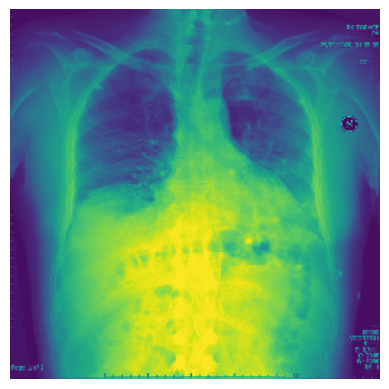

1/1 [==============================] - 0s 182ms/step
2
Covid
(256, 256)


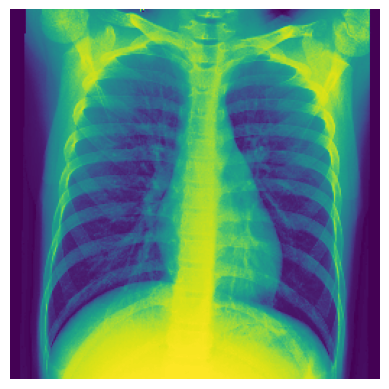

1/1 [==============================] - 0s 51ms/step
0
Normal
(256, 256)


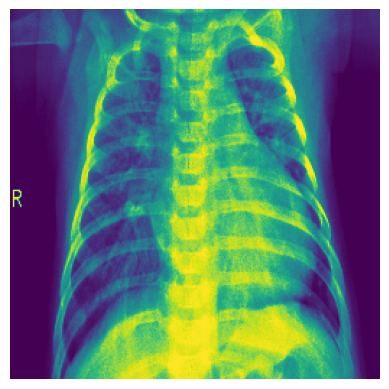

1/1 [==============================] - 0s 51ms/step
1
Viral_Pneumonia


In [ ]:
import telebot
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Initialize the Telegram bot
bot = telebot.TeleBot("6020437495:AAHBCHJFx6OnQSqLpYBhmq0vMTuWAJW1ddE")

# Load the Keras model
model = load_model('/content/Lung_covid.h5')



@bot.message_handler(commands=['start', 'help'])
def handle_start_help(message):
    bot.reply_to(message, "Hello! Send me an image, and I will process it.")

@bot.message_handler(content_types=['photo'])
def handle_image(message):
    # Check if the message contains a photo
    if message.photo:
        # Get the file_id of the photo
        file_id = message.photo[-1].file_id

        # Get the file object and download the image
        file_info = bot.get_file(file_id)
        downloaded_file = bot.download_file(file_info.file_path)

        # Save the image locally
        image_path = 'image.jpg'
        with open(image_path, 'wb') as f:
            f.write(downloaded_file)

        img=cv.imread('image.jpg')
        img=cv.resize(img,[256,256])
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        p1=img.reshape(1,256,256)
        print(img.shape)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        arrayforouput=model.predict(p1)
        classa=arrayforouput.argmax()
        print(classa)
        if(classa==0):
            msg='Normal'
            print("Normal")
        elif(classa==1):
            msg='Viral_Pneumonia'
            print("Viral_Pneumonia")
        else:
            msg='Covid'
            print("Covid")

        # Send the result back to the user
        bot.reply_to(message, f"The image is classified as: {msg}")
    else:
        # If no photo is sent, reply to the user
        bot.reply_to(message, "Please send me an image.")

bot.polling()